In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it

import jieba
import re
import numpy as np
from PIL import Image
from func import *

In [2]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from io import StringIO

In [3]:
def readPDF(file_name):
    parser = PDFParser(open(file_name, 'rb'))
    doc = PDFDocument()
    parser.set_document(doc)
    doc.set_parser(parser)
    doc.initialize('')
    rsrcmgr = PDFResourceManager()
    device = PDFPageAggregator(rsrcmgr, laparams = LAParams(all_texts = True))
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    content = []

    for page in doc.get_pages():
        interpreter.process_page(page)
        layout = device.get_result()
        text = ''
        for lt_obj in layout:
            if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                text += re.sub('\s', '', lt_obj.get_text())
        content.append(text)
    return content

In [8]:
def getBetween(file ,p_1, text_1, p_2, text_2):
    page_1 = file[p_1]
    page_2 = file[p_2]
    btn = ''
    btn += page_1[page_1.find(text_1):-1]
    for i in range(p_1 + 1, p_2, 1):
        btn += file[i]
    btn += page_2[0:(page_2.find(text_2) + len(text_2))]
    return btn

In [6]:
text = readPDF('week5/第一段時間文字檔.pdf')
print('Total Pages : ', len(text))

Total Pages :  19


In [9]:
wee = getBetween(text, 0, '1. 鴻夏戀 郭台銘沒學的', 18, '答案也將會在那一天揭曉。')
print(wee[0:500], '\n......\n', wee[-500:])

首先，大家原本就不該期待夏普高層會很快做出決策。其實夏普現在開發產品的能力仍強，有問題的只是經營團隊的資質，而這是日本特有終生雇用制度造成的弊病；日本人把社長這個職位，用來犒賞績效佳的中階主管，很少考慮這個人是否有經營者的資質。郭台銘應該要先設定一個前提，就是他的談判對象是「無法做出決策」的低能力經營高層。其次，即使在日本，大阪也是一個有獨特文化的地方，Panasonic和夏普之於大阪人，就像奇美實業之於台南人，是當地的驕傲。而對日本人、尤其是大阪人引以為傲的夏普這家企業，郭台銘的舉止並不符合「日式」的禮數。例如，台灣的經營者彼此如果達成協議，就代表企業間正式做成決定了；但是日本企業必須再召開董事會，經過審議和決議，否則即使談判對象是社長，也不是「組織的決定」。二月四日郭台銘臨時到日本，二月五日兩位最高層級的人達成協議，但日本企業要正式做成代表企業的決定，必須經過召開董事會等手續，無視這個程序就要簽約，等於是無視日本的企業習慣。我們這些和台灣有往來的少數日本人，知道鴻海是台灣多大的一家企業，但是多數日本人並不知道，日本大企業的社長也不會在門口或大馬路上開記者會。鴻海應該在二月五日傍晚， 
......
 。另外，由於INCJ主張解散現有的夏普經營團隊，但據說郭台銘曾以「永遠的好朋友」稱之的高橋興三社長以下主管根本就不想離開，所以目前的團隊也成了鴻海的助攻力量不確定的因素然而，鴻海也不是全然佔盡優勢。因為對於之前鴻海曾經答應增資又取消，夏普內部早就留下了不好的印象；再加上併購之後鴻海究竟會讓夏普員工全員留任、還是只留四十歲以下的員工，也是讓夏普員工一直很質疑的問題。此外，由於日本人認為鴻海無論在消費性產品、以及廣告宣傳操作都還只是「初級生」程度，所以對於夏普被收入鴻海旗下之後，是否就能夠絕地逢生，心裡還是有點忐忑不安。郭董之野望從郭台銘去年三月親筆在白板上寫的幾點，更可以明白看出他對夏普的野心：從不同角度的立場給他們經營建議。如果我們投資進去本社，我們會給經營團隊要想辦法一定要賺錢的壓力，PUSH他們改變。對於經營不善的事業部門，要轉型或改變商業模式。協助他們提高效率，降低成本。協助他們開拓新的市場。不只是「天下無難事，只怕有心人」，郭台銘也寫下了這兩句話：「成功者找方法，失敗者找理由」；鴻海究竟能不能在2月29日畢其功於一役、日本人究竟會不會對新的商業模式信服，答案

In [10]:
jieba.load_userdict('./dict.txt')
seg_list = jieba.cut(wee[0:5000], cut_all=False)
print(" / ".join(seg_list))

首先 / ， / 大家 / 原本 / 就 / 不 / 該 / 期待 / 夏 / 普高 / 層會 / 很快 / 做出 / 決策 / 。 / 其實 / 夏普現 / 在 / 開 / 發產品 / 的 / 能力 / 仍強 / ， / 有 / 問題 / 的 / 只是 / 經營 / 團隊 / 的 / 資質 / ， / 而 / 這是 / 日本 / 特有 / 終生 / 雇用 / 制度 / 造成 / 的 / 弊病 / ； / 日本 / 人 / 把 / 社長 / 這個 / 職位 / ， / 用來 / 犒賞績 / 效佳 / 的 / 中階 / 主管 / ， / 很少 / 考慮 / 這個 / 人 / 是否 / 有 / 經營者 / 的 / 資質 / 。 / 郭台銘 / 應該 / 要 / 先 / 設定 / 一個 / 前提 / ， / 就是 / 他 / 的 / 談判 / 對 / 象是 / 「 / 無法 / 做出 / 決策 / 」 / 的 / 低 / 能力 / 經營 / 高層 / 。 / 其次 / ， / 即使 / 在 / 日本 / ， / 大阪 / 也 / 是 / 一個 / 有 / 獨特 / 文化 / 的 / 地方 / ， / Panasonic / 和 / 夏普 / 之 / 於 / 大阪 / 人 / ， / 就 / 像 / 奇美 / 實業 / 之 / 於 / 台南人 / ， / 是 / 當地 / 的 / 驕傲 / 。 / 而 / 對 / 日本 / 人 / 、 / 尤其 / 是 / 大阪 / 人 / 引以 / 為傲 / 的 / 夏普 / 這家 / 企業 / ， / 郭台銘 / 的 / 舉止 / 並不 / 符合 / 「 / 日式 / 」 / 的 / 禮數 / 。 / 例如 / ， / 台灣 / 的 / 經營者 / 彼此 / 如果 / 達成 / 協議 / ， / 就 / 代表 / 企業間 / 正式 / 做成 / 決定 / 了 / ； / 但是 / 日本 / 企業 / 必須 / 再 / 召開 / 董事 / 會 / ， / 經過 / 審議 / 和 / 決議 / ， / 否則 / 即使 / 談判 / 對 / 象是 / 社長 / ， / 也 / 不是 / 「 / 組織 / 的 / 決定 / 」 / 。 / 二月 / 四日 / 郭台銘 / 臨時 / 到 / 日本 / ， / 二月 / 五日 / 兩位 / 最高 /

In [25]:
stopwords = ['一','二','三','四','五','六','了','和','不','蘋果','是','有','合','會','就','可以','都','他','來','億日圓','鴻海','日本','夏普','郭台銘','面板','用','淨','利','值','但','中','可','認','我','無','彙','列','將','對', '\n', '之', '率','已','由','佔','本','日','月','年','另','故','於','較','請','再', '經','也','在','依','到','等','或', '認列', '為', '按','比','仍', '係', '後', '及', '與', '以', '時', '該','的','並','更','註','例如','可能','由於','因此','附註',
            '部分','事項','各位','晶華','品牌','集團','幅度','資產','新','台幣','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響','帳金額','本會','計師','之會計','報表','會計師','財務','詳合','結果','預測','如下','之一','附註','附','註','其中','併','合','因為','查核',
             '報告','性事','增加','會計','相對','仟元','金額','權益','能力','利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金','評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算','資金','評估','人次','重大','資訊','總額','民國','估計','','一副','公司','年度','包括',
             '正確性','正','確性','減損','共為','預估','預算','維持','公開','整體','表示','特性','市場','科目','總資產','發生','年本','正確性','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','執行','程序','測試','稅後淨利','1','2','3','4','5','6','7','8','9','0','NT']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""

In [26]:
seg_list = jieba.cut(wee, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs_Full) and (w not in puncs_Half) and (bool(re.match('[^0-9]', w))):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print('Number of word : ', len(wordDict))

Number of word :  2264


In [27]:
times = 1000
for i in wordDict.items():
    print(i, end = '')
    if times==0:
        break
    else:
        times = times - 1

('首先', 2)('大家', 1)('原本', 4)('期待', 3)('夏', 19)('普高', 5)('層會', 1)('很快', 1)('做出', 5)('決策', 2)('其實', 1)('夏普現', 1)('開', 4)('發產品', 1)('仍強', 1)('問題', 9)('只是', 6)('經營', 24)('團隊', 6)('資質', 2)('而', 10)('這是', 7)('特有', 1)('終生', 1)('雇用', 1)('制度', 1)('造成', 2)('弊病', 1)('人', 12)('把', 8)('社長', 14)('這個', 7)('職位', 1)('用來', 2)('犒賞績', 1)('效佳', 1)('中階', 1)('主管', 6)('很少', 1)('考慮', 10)('是否', 5)('經營者', 4)('應該', 5)('要', 19)('先', 2)('設定', 1)('一個', 10)('前提', 2)('就是', 9)('談判', 13)('象是', 2)('無法', 3)('低', 3)('高層', 4)('其次', 1)('即使', 4)('大阪', 10)('獨特', 1)('文化', 2)('地方', 2)('Panasonic', 1)('像', 2)('奇美', 1)('實業', 1)('台南人', 1)('當地', 1)('驕傲', 1)('尤其', 2)('引以', 1)('為傲', 1)('這家', 3)('企業', 15)('舉止', 1)('並不', 1)('符合', 1)('日式', 1)('禮數', 1)('台灣', 10)('彼此', 1)('如果', 7)('達成', 2)('協議', 11)('代表', 3)('企業間', 1)('正式', 5)('做成', 2)('決定', 10)('但是', 6)('必須', 3)('召開', 6)('董事', 22)('經過', 4)('審議', 1)('決議', 1)('否則', 3)('不是', 10)('組織', 2)('二月', 4)('四日', 1)('臨時', 1)('五日', 2)('兩位', 1)('最高', 2)('層級', 1)('人達成', 1)('手續', 1)('無視', 2)('就要', 1)('簽約', 

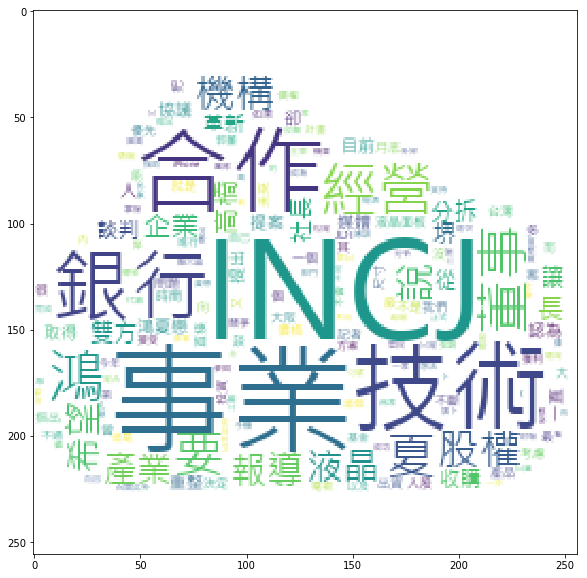

In [28]:
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("week4/cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("week5/wowcool.png")